Importamos las librerias necesarias

In [56]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.utils import np_utils
import keras.backend as K
from keras.utils import to_categorical
import keras
from tensorflow.keras.layers import BatchNormalization
import tensorflow.keras.metrics as metrics
import matplotlib.pyplot as plt

train_imgs = np.load('train_images.npy')
train_labels = pd.read_csv('train_labels.csv')
test_imgs = np.load('test_images.npy')

<function matplotlib.pyplot.show(close=None, block=None)>

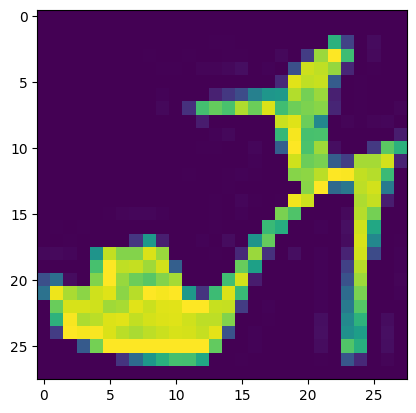

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_imgs[9,...])
plt.show

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


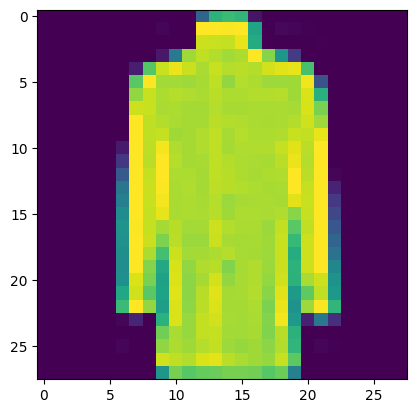

In [ ]:
images = train_imgs  # array of images
categories = train_labels # array of categories

# Get the unique categories
unique_categories = np.unique(train_labels)

# Create a dictionary to store the datasets
datasets = {}

# Split the images into separate datasets based on categories
for category in unique_categories:
    # Find the indices of images belonging to the current category
    indices = np.where(categories == category)[0]
    
    # Extract the images for the current category
    category_images = images[indices]
    
    # Add the category images to the datasets dictionary
    datasets[category] = category_images

print(datasets.keys())

plt.imshow(datasets[4][6])

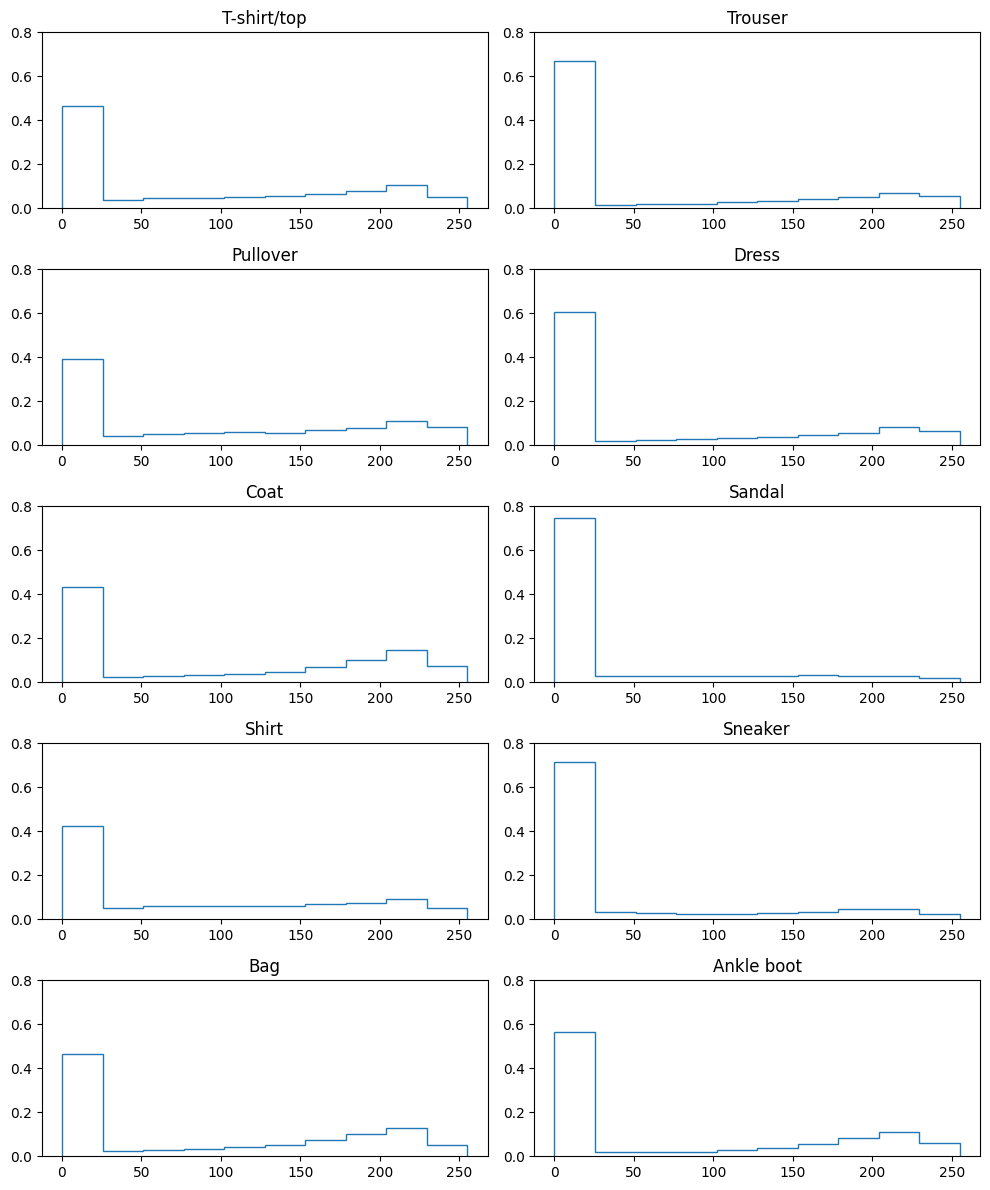

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(5, 2, figsize=(10, 12))

keys = {
0:    'T-shirt/top',
1:    'Trouser',
2:    'Pullover',
3:    'Dress',
4:    'Coat',
5:    'Sandal',
6:    'Shirt',
7:    'Sneaker',
8:    'Bag',
9:    'Ankle boot'}

for ind, ax in enumerate(axes.flatten()):
  counts, bins = np.histogram(datasets[ind].flatten())
  ax.stairs(counts/datasets[ind].flatten().size, bins)
  ax.set_ylim([0,.8])
  ax.set_title(str(keys[ind]))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

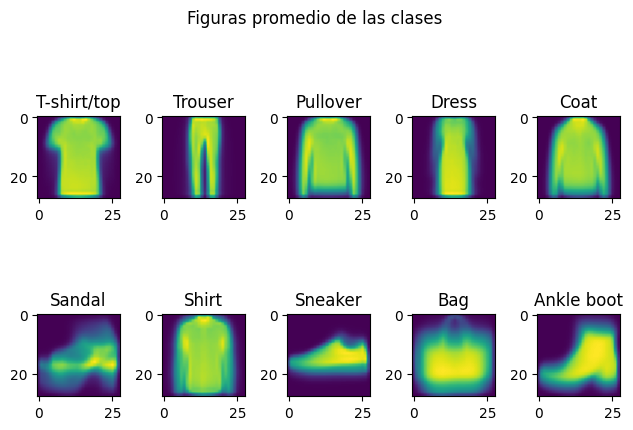

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 5)

for ind, ax in enumerate(axes.flatten()):

  ax.imshow(np.average(datasets[ind], axis=0))
  ax.set_title(str(keys[ind]))

fig.suptitle('Figuras promedio de las clases')
# Adjust spacing between subplots
fig.tight_layout()
# Display the plot
plt.show()

Separacion entre train y validación, data augmentation

In [57]:
from sklearn.model_selection import train_test_split

labels= np.array(train_labels['label'])
train_imgs = np.load('train_images.npy')
print(train_imgs.shape, labels.shape)
X_train, X_val, y_train, y_val = train_test_split(train_imgs, labels, test_size=0.1, random_state=50)

flipped = np.flip(X_train, axis=2)
X_train = np.concatenate((X_train, flipped), axis=0)
y_train = np.concatenate((y_train,y_train), axis=0)

X_val = X_val


y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)


(60000, 28, 28) (60000,)


Código Softmax

Código MLP


Modelo softmax

In [ ]:
output_size = 10
normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
softmax_model = Sequential()
softmax_model.add(Flatten(input_shape=(28,28)))
softmax_model.add(BatchNormalization())
softmax_model.add(Dense(output_size, activation='softmax',  kernel_initializer=uniform_initializer, name='salida'))
softmax_model.summary()

import time
adam = optimizers.Adam(lr=0.001, decay=1E-4) #decay=1e-4
checkpointer = ModelCheckpoint(filepath='softmax.mnist.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')

earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

softmax_model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

softmax_model.fit(X_train, 
          y_train_categorical ,
          epochs=100, batch_size=2048, 
          verbose=0, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[checkpointer, earlyStopping],
         )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 salida (Dense)              (None, 10)                7850      
                                                                 
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


c:\Users\joaco\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: val_accuracy improved from -inf to 0.69867, saving model to softmax.mnist.hdf5

Epoch 2: val_accuracy improved from 0.69867 to 0.77083, saving model to softmax.mnist.hdf5

Epoch 3: val_accuracy improved from 0.77083 to 0.80067, saving model to softmax.mnist.hdf5

Epoch 4: val_accuracy improved from 0.80067 to 0.81167, saving model to softmax.mnist.hdf5

Epoch 5: val_accuracy improved from 0.81167 to 0.81917, saving model to softmax.mnist.hdf5

Epoch 6: val_accuracy improved from 0.81917 to 0.82217, saving model to softmax.mnist.hdf5

Epoch 7: val_accuracy improved from 0.82217 to 0.82433, saving model to softmax.mnist.hdf5

Epoch 8: val_accuracy improved from 0.82433 to 0.82850, saving model to softmax.mnist.hdf5

Epoch 9: val_accuracy improved from 0.82850 to 0.82917, saving model to softmax.mnist.hdf5

Epoch 10: val_accuracy improved from 0.82917 to 0.83100, saving model to softmax.mnist.hdf5

Epoch 11: val_accuracy improved from 0.83100 to 0.83367, saving model to softmax.

In [ ]:
softmax_model.save("softmax_model")

INFO:tensorflow:Assets written to: softmax_model\assets


Modelo MPL

In [79]:
def train_model(X_train, y_train_categorical, X_val, y_val_categorical, opt, b_s, act, pat, init):

    earlyStopping = keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        min_delta=0,
        patience=pat,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
    )

    output_size = 10

    K.clear_session()
    model_mpl = Sequential()
    model_mpl.add(Flatten(input_shape=(28,28)))
    model_mpl.add(BatchNormalization())
    model_mpl.add(Dense(200, activation=act, kernel_initializer=init, name='middle1'))
    model_mpl.add(Dense(output_size, activation='softmax',  kernel_initializer=init, name='salida'))
    model_mpl.compile(loss = 'categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

    #sys.stdout = open(os.devnull, 'w')
    history = model_mpl.fit(X_train, 
        y_train_categorical ,
        epochs=100, batch_size=b_s, 
        verbose=0, 
        validation_data=(X_val, y_val_categorical), 
        callbacks=[earlyStopping],
        )

    val_acc = history.history["val_accuracy"]

    return val_acc



In [80]:
#red 4
import sys, os


batch_sizes = [500, 2000, 10000, 20000]
accuracy_values = []
for batch_size in batch_sizes:
    acc_val_hist = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.Adam(lr=0.001, decay=1E-4), 
    b_s=batch_size, 
    act='relu', 
    pat=10, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)


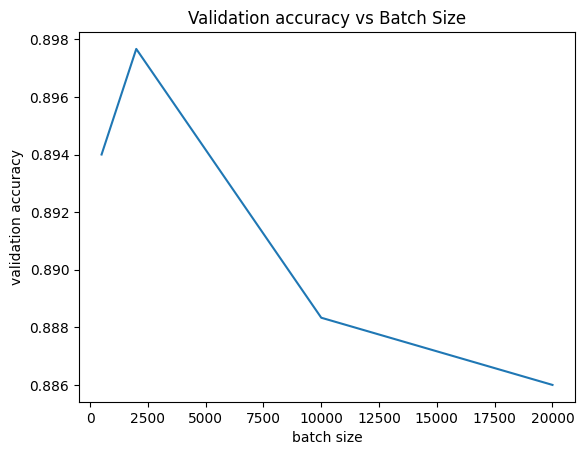

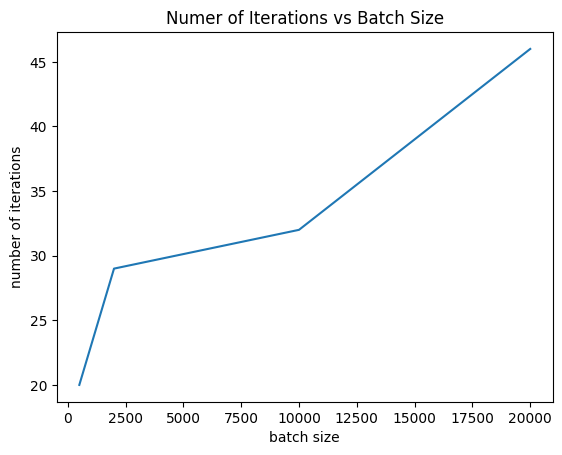

In [81]:

plt.xlabel("batch size")
plt.ylabel("validation accuracy")
plt.title("Validation accuracy vs Batch Size")
plt.plot(batch_sizes, [x[-1] for x in accuracy_values])
plt.show()
plt.xlabel("batch size")
plt.ylabel("number of iterations")
plt.title("Numer of Iterations vs Batch Size")
plt.plot(batch_sizes, [len(x) for x in accuracy_values])

In [83]:

learning_rates = [0.0001, 0.001, 0.1]
accuracy_values = []

for learning_rate in learning_rates:

    acc_val_hist = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.SGD(lr=learning_rate), 
    b_s=2500, 
    act='relu', 
    pat=10, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)


ValueError: x and y must have same first dimension, but have shapes (3,) and (4,)

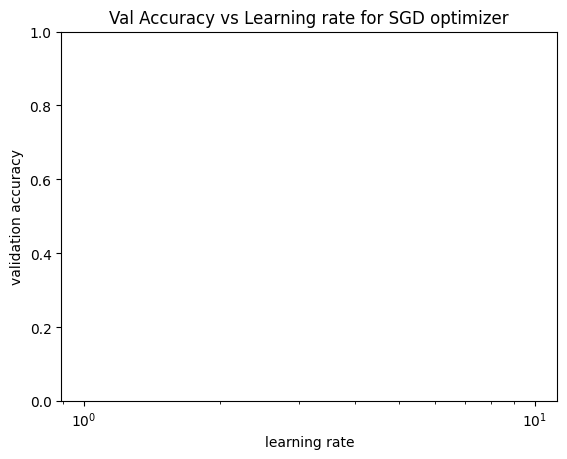

In [85]:
plt.xlabel("learning rate")
plt.ylabel("validation accuracy")
plt.xscale('log')
plt.title('Val Accuracy vs Learning rate for SGD optimizer')
plt.plot(learning_rates, [x[-1] for x in accuracy_values])
plt.show()

plt.xlabel("learning rate")
plt.ylabel("validation accuracy")
plt.xscale('log')
plt.title('Numer of Iterations vs Learning rate for SGD optimizer')
plt.plot(learning_rates, [len(x) for x in accuracy_values])

In [84]:

my_optimizers = [optimizers.SGD(lr=0.05), optimizers.Adam(lr=0.01),optimizers.Adamax(lr=0.01),optimizers.Nadam(lr=0.01)]
accuracy_values = [ ]

for optimizer in my_optimizers:
    acc_val_hist = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizer, 
    b_s=2500, 
    act='relu', 
    pat=5, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)



C:\Users\joaco\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\joaco\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


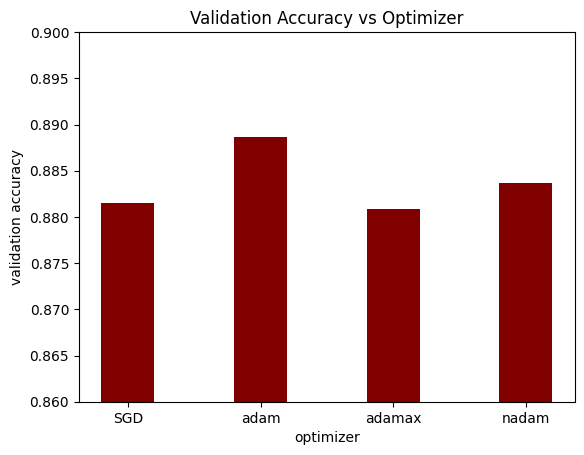

Text(0.5, 1.0, 'Numer of Iterations vs Optimizer')

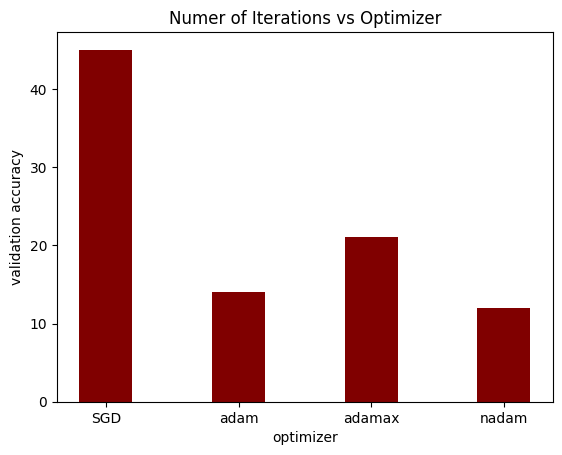

In [ ]:
# Create the bar plot
# creating the bar plot
plt.bar(['SGD', 'adam', 'adamax', 'nadam'], [x[-1] for x in accuracy_values], color ='maroon',
        width = 0.4)

# Set labels and title
plt.xlabel("optimizer")
plt.ylabel("validation accuracy")
plt.title('Validation Accuracy vs Optimizer')

# Display the plot
plt.ylim(0.86, 0.9)
plt.show()

plt.bar(['SGD', 'adam', 'adamax', 'nadam'], [len(x) for x in accuracy_values], color ='maroon',
        width = 0.4)

# Set labels and title
plt.xlabel("optimizer")
plt.ylabel("validation accuracy")
plt.title('Numer of Iterations vs Optimizer')

In [ ]:
activations = ['relu', 'tanh', 'sigmoid', 'softplus']
accuracy_values = [ ]

for activation in activations:

    acc_val_hist = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.Adam(lr=learning_rate, decay=1e-4), 
    b_s=2500, 
    act=activation, 
    pat=10, 
    init=keras.initializers.GlorotNormal)
    accuracy_values.append(acc_val_hist)


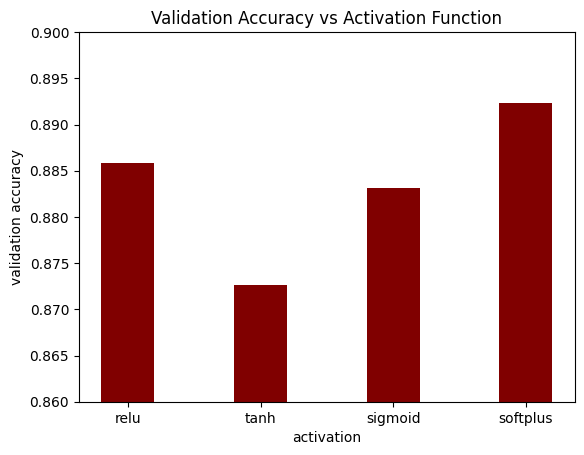

Text(0.5, 1.0, 'Number of Iterations vs Activation Function')

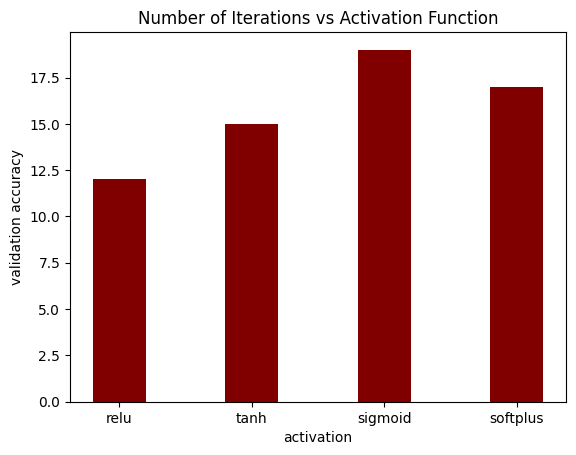

In [ ]:
# Create the bar plot
# creating the bar plot
plt.bar(activations, [x[-1] for x in accuracy_values], color ='maroon',
        width = 0.4)

# Set labels and title
plt.xlabel("activation")
plt.ylabel("validation accuracy")
plt.title('Validation Accuracy vs Activation Function')

# Display the plot

# Display the plot
plt.ylim(0.86, 0.9)
plt.show()

# Create the bar plot
# creating the bar plot
plt.bar(activations, [len(x) for x in accuracy_values], color ='maroon',
        width = 0.4)

# Set labels and title
plt.xlabel("activation")
plt.ylabel("validation accuracy")
plt.title('Number of Iterations vs Activation Function')

In [ ]:
initializtions = [keras.initializers.RandomNormal(mean=0., stddev=.1),
                  keras.initializers.RandomNormal(mean=0., stddev=1.), 
                  keras.initializers.GlorotNormal, 
                  keras.initializers.GlorotUniform]
accuracy_values = [ ]

for initialization in initializtions:
    acc_val_hist = train_model(X_train, y_train_categorical, X_val, y_val_categorical,
    opt=optimizers.Adam(lr=learning_rate, decay=1e-4), 
    b_s=2500, 
    act=activation, 
    pat=10, 
    init=initialization)
    accuracy_values.append(acc_val_hist)


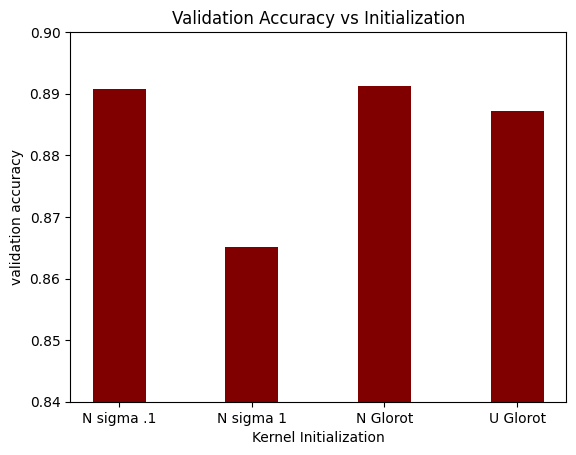

Text(0.5, 1.0, 'Number of Iterations vs Initialization')

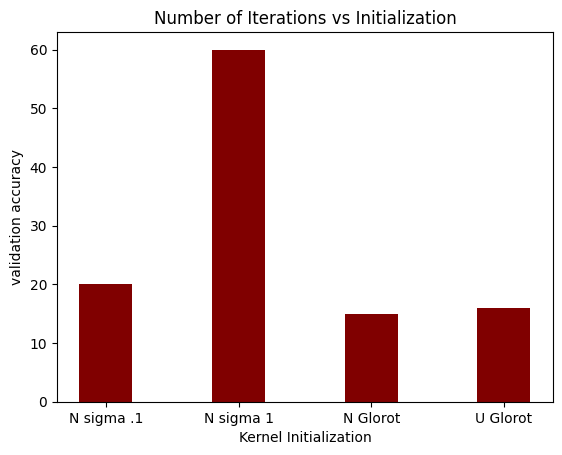

In [ ]:
# Create the bar plot
# creating the bar plot
plt.bar(['N sigma .1', 'N sigma 1', 'N Glorot', 'U Glorot'], [x[-1] for x in accuracy_values], color ='maroon',
        width = 0.4)

# Set labels and title
plt.xlabel("Kernel Initialization")
plt.ylabel("validation accuracy")
plt.title('Validation Accuracy vs Initialization')

# Display the plot

# Display the plot
plt.ylim(0.84, 0.9)
plt.show()

# Create the bar plot
# creating the bar plot
plt.bar(['N sigma .1', 'N sigma 1', 'N Glorot', 'U Glorot'], [len(x) for x in accuracy_values], color ='maroon',
        width = 0.4)

# Set labels and title
plt.xlabel("Kernel Initialization")
plt.ylabel("validation accuracy")
plt.title('Number of Iterations vs Initialization')

Lottery Ticket

In [ ]:


output_size = 10
normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(BatchNormalization())
model.add(Dense(500, activation='relu', kernel_initializer=normal_initializer, name='middle0'))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu', kernel_initializer=normal_initializer, name='middle1'))
model.add(Dropout(0.2))
model.add(Dense(500, kernel_initializer=normal_initializer, name='middle2'))
model.add(BatchNormalization())
model.add(Dense(500, activation='relu', kernel_initializer=normal_initializer, name='middle3'))
model.add(Dropout(0.2))
model.add(Dense(output_size, activation='softmax',  kernel_initializer=normal_initializer, name='salida'))
model.summary()

import time
adam = optimizers.Adam(lr=0.001, decay=1E-4) #decay=1e-4
checkpointer = ModelCheckpoint(filepath='mpl.mnist.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')

earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.save('model_without_training')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle0 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 middle1 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                        

C:\Users\joaco\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


INFO:tensorflow:Assets written to: model_without_training\assets


In [ ]:
model.fit(X_train, 
          y_train_categorical ,
          epochs=200, batch_size=2048, 
          verbose=0, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[checkpointer, earlyStopping],
         )
model.save('trained_model')


Epoch 1: val_accuracy improved from -inf to 0.78533, saving model to mpl.mnist.hdf5

Epoch 2: val_accuracy improved from 0.78533 to 0.87233, saving model to mpl.mnist.hdf5

Epoch 3: val_accuracy improved from 0.87233 to 0.88533, saving model to mpl.mnist.hdf5

Epoch 4: val_accuracy improved from 0.88533 to 0.88883, saving model to mpl.mnist.hdf5

Epoch 5: val_accuracy improved from 0.88883 to 0.89250, saving model to mpl.mnist.hdf5

Epoch 6: val_accuracy improved from 0.89250 to 0.89683, saving model to mpl.mnist.hdf5

Epoch 7: val_accuracy did not improve from 0.89683

Epoch 8: val_accuracy improved from 0.89683 to 0.89833, saving model to mpl.mnist.hdf5

Epoch 9: val_accuracy improved from 0.89833 to 0.90017, saving model to mpl.mnist.hdf5

Epoch 10: val_accuracy did not improve from 0.90017

Epoch 11: val_accuracy improved from 0.90017 to 0.90117, saving model to mpl.mnist.hdf5

Epoch 12: val_accuracy did not improve from 0.90117

Epoch 13: val_accuracy improved from 0.90117 to 0.9

In [ ]:
K.clear_session()
model_wo_training = keras.models.load_model("model_without_training")
model_w_training = keras.models.load_model("trained_model")



initial_weights = model_wo_training.get_weights()
final_weights = model_w_training.get_weights()

weight_diff = [np.abs(initial - final) for initial, final in zip(initial_weights, final_weights)]


flattened_diff = np.concatenate([arr.flatten() for arr in weight_diff])
sorted_indices = np.argsort(flattened_diff)[::-1]


threshold_index = int(len(sorted_indices) * 0.5)
threshold = flattened_diff[sorted_indices[threshold_index]]


modified_weights = []
for initial, final in zip(initial_weights, final_weights):
    mask = np.abs(final - initial) >= threshold
    modified_weights.append(np.where(mask, initial, 0.0))

final_model = keras.models.load_model("model_without_training")
final_model.set_weights(modified_weights)



In [ ]:

adam = optimizers.Adam(lr=0.001, decay=1E-4) #decay=1e-4
checkpointer = ModelCheckpoint(filepath='mpl.mnist.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')
earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=15,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
#final_model = keras.models.load_model("model_without_training")
#final_model.set_weights(modified_weights)
final_model.fit(X_train, 
          y_train_categorical ,
          epochs=200, batch_size=2048, 
          verbose=0, 
          validation_data=(X_val, y_val_categorical), 
          callbacks=[checkpointer, earlyStopping],
         )



Epoch 1: val_accuracy improved from -inf to 0.90767, saving model to mpl.mnist.hdf5

Epoch 2: val_accuracy did not improve from 0.90767

Epoch 3: val_accuracy improved from 0.90767 to 0.90783, saving model to mpl.mnist.hdf5

Epoch 4: val_accuracy improved from 0.90783 to 0.91083, saving model to mpl.mnist.hdf5

Epoch 5: val_accuracy did not improve from 0.91083

Epoch 6: val_accuracy did not improve from 0.91083

Epoch 7: val_accuracy did not improve from 0.91083

Epoch 8: val_accuracy did not improve from 0.91083

Epoch 9: val_accuracy did not improve from 0.91083

Epoch 10: val_accuracy did not improve from 0.91083

Epoch 11: val_accuracy did not improve from 0.91083

Epoch 12: val_accuracy did not improve from 0.91083

Epoch 13: val_accuracy did not improve from 0.91083

Epoch 14: val_accuracy did not improve from 0.91083

Epoch 15: val_accuracy did not improve from 0.91083

Epoch 16: val_accuracy did not improve from 0.91083

Epoch 17: val_accuracy did not improve from 0.91083

Ep

In [ ]:

x_test = np.load('test_images.npy')
y_test = final_model.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission4bis.csv",index=False)

313/313 [==============================] - 1s 3ms/step


In [ ]:
x_test = np.load('test_images.npy')
y_test = model.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)

Problema de Regresión

In [87]:
from tensorflow.keras.datasets import mnist
import pandas as pd
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
train_morpho = pd.read_csv("train-morpho.csv")
test_morpho = pd.read_csv("t10k-morpho.csv")

In [88]:
train_morpho

,index,area,length,thickness,slant,width,height
0,0,107.3125,50.266504,2.460658,0.231074,14.539572,19.849054
1,1,123.2500,51.198485,2.616601,0.331858,15.387810,19.341053
2,2,78.3750,45.927670,1.891592,-0.212196,20.479656,19.114880
3,3,67.3125,22.849242,2.919769,0.509185,5.358179,19.724599
4,4,91.1875,46.284271,2.247425,0.007590,13.275437,19.527523
...,...,...,...,...,...,...,...
59995,59995,102.1875,61.415999,1.941380,0.366472,11.840672,19.937599
59996,59996,108.5625,46.705844,2.538071,0.364359,13.325950,19.688557
59997,59997,87.0625,44.523864,2.058077,0.257784,14.133500,20.070647
59998,59998,82.2500,53.337572,1.667193,0.310377,15.251961,19.692976


In [106]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [91]:
for item in train_morpho.keys():
    print('correlation between '+item+ 'and slant is: ', train_morpho['slant'].corr(train_morpho[item]))

correlation between indexand slant is:  -0.006514073348763724
correlation between areaand slant is:  -0.005367359748599988
correlation between lengthand slant is:  -0.020269380801968277
correlation between thicknessand slant is:  0.00705162584853723
correlation between slantand slant is:  1.0
correlation between widthand slant is:  -0.15834194904399065
correlation between heightand slant is:  -0.14276048322572704


In [105]:

normal_initializer = keras.initializers.GlorotNormal
uniform_initializer = keras.initializers.GlorotUniform

K.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(BatchNormalization())
model.add(Dense(500, activation='relu', kernel_initializer=normal_initializer, name='middle0'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu', kernel_initializer=normal_initializer, name='middle1'))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer=normal_initializer, name='middle2'))
model.add(Dense(1, name='salida'))
model.summary()

earlyStopping = keras.callbacks.EarlyStopping(
    monitor="mae",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

model.compile(loss = 'mean_squared_error', optimizer=optimizers.Adam(lr=0.001, decay=1E-4), metrics=['mae'])


model.fit(x_train, 
          np.array(train_morpho['slant']),
          epochs=200, batch_size=2048, 
          verbose=1, 
          validation_data=(x_test, np.array(test_morpho['slant'])), 
          callbacks=[earlyStopping],
         )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 middle0 (Dense)             (None, 500)               392500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 middle1 (Dense)             (None, 200)               100200    
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                        